**Scaling using StandardScaler**

In [21]:
import pandas as pd
import numpy as np



df=pd.read_csv('Cleaned_df.csv')
df.head(5)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_hace2_59.97,saldo_medio_var29_hace2_868.98,saldo_medio_var29_hace2_4838.7,saldo_medio_var29_hace2_10430.01,saldo_medio_var29_ult1_2142.87,saldo_medio_var29_ult1_3365.46,saldo_medio_var29_ult1_13793.67,saldo_medio_var29_ult3_3365.46,saldo_medio_var29_ult3_3490.8,saldo_medio_var29_ult3_7331.34
0,2,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,37,0,195,195,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(75904, 671)

In [ ]:
df.dtypes

,0
var3,int64
var15,int64
imp_ent_var16_ult1,int64
imp_op_var39_comer_ult1,int64
imp_op_var39_comer_ult3,int64
...,...
saldo_medio_var29_ult1_3365.46,int64
saldo_medio_var29_ult1_13793.67,int64
saldo_medio_var29_ult3_3365.46,int64
saldo_medio_var29_ult3_3490.8,int64


In [22]:
#Scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('TARGET', axis=1)
y = df['TARGET']

numeric_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training on 80% train, 20% test
print(X_train.shape, X_test.shape)

(60723, 670) (15181, 670)


In [ ]:
df.head(5)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_hace2_59.97,saldo_medio_var29_hace2_868.98,saldo_medio_var29_hace2_4838.7,saldo_medio_var29_hace2_10430.01,saldo_medio_var29_ult1_2142.87,saldo_medio_var29_ult1_3365.46,saldo_medio_var29_ult1_13793.67,saldo_medio_var29_ult3_3365.46,saldo_medio_var29_ult3_3490.8,saldo_medio_var29_ult3_7331.34
0,2,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,37,0,195,195,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Baseline Logistic Regression**

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


logistic=LogisticRegression(class_weight='balanced',max_iter=5000,random_state=42)
logistic.fit(X_train, y_train)

y_pred_logistic = logistic.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic, average='macro')
precision = precision_score(y_test, y_pred_logistic, average='macro')
recall = recall_score(y_test, y_pred_logistic, average='macro')

print(f'Scores (Logistic Regression - Baseline):')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Scores (Logistic Regression - Baseline):
Accuracy: 0.6897
F1 Score: 0.4871
Precision: 0.5387
Recall: 0.7186


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Creating confusion matrix to get an idea on how well the model is predicting


cm = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


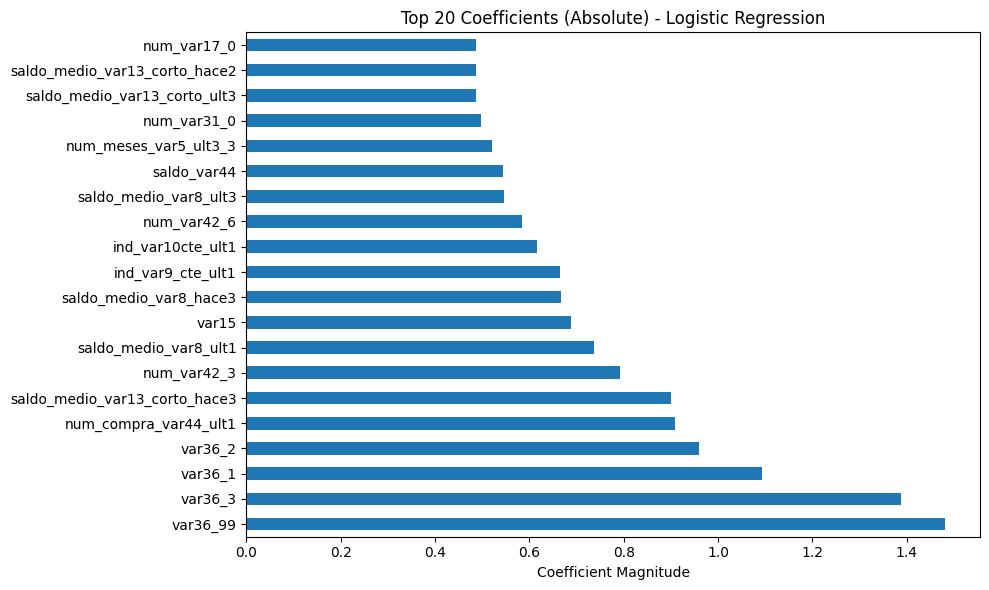

In [ ]:
log_coefs = logistic.coef_[0]
log_features = pd.Series(abs(log_coefs), index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
log_features[:20].plot(kind='barh')
plt.title('Top 20 Coefficients (Absolute) - Logistic Regression')
plt.xlabel('Coefficient Magnitude')
plt.tight_layout()
plt.show()

**XG Boost for Binary Classification**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier

X = df.drop('TARGET', axis=1)
y = df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#using binary logistic
xg_clf = XGBClassifier(objective='binary:logistic',n_estimators=100, seed=42)

xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Getting accuracy, precision, recall, f1scores

y_pred = xg_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision=precision_score(y_test, y_pred, average='macro')
recall=recall_score(y_test, y_pred, average='macro')

# I will use macro because the target variable is imbalanced

print(f'Scores (XG Boosting) rows: ')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f'Precision: {precision:.4f}')
print(f'recall: {recall:.4f}')


Scores (XG Boosting) rows: 
Accuracy: 0.8308
F1 Score: 0.5676
Precision: 0.5612
recall: 0.7296


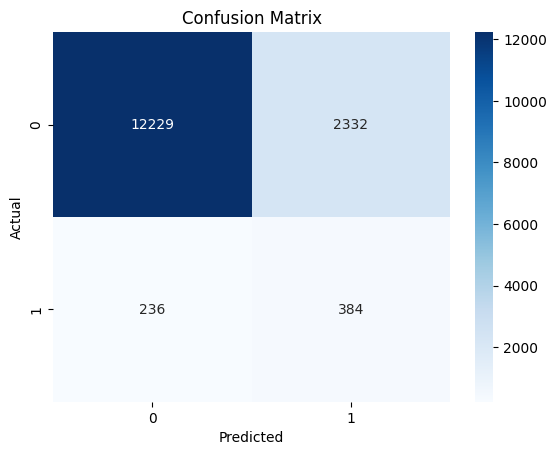

In [ ]:
# Confusion matrix for XG Boosting

# 0 = Customer is satisfied
# 1 = Customer is not satisfied

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#The model seems to be predicting customer satisfaction well, however it appears
## that the model does not predict dissatisfation well

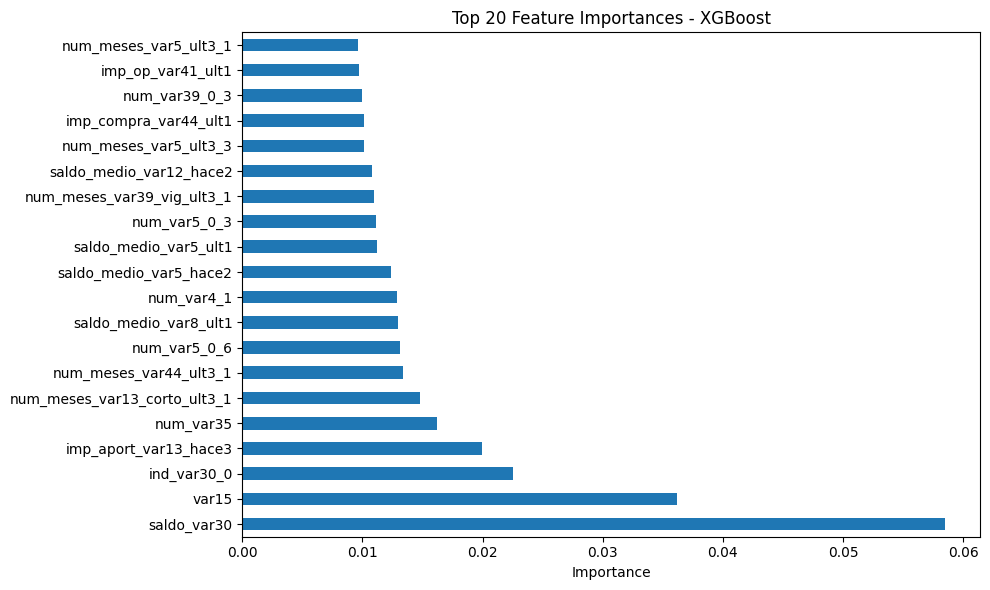

In [ ]:

import matplotlib.pyplot as plt

xgb_importances = xg_clf.feature_importances_
xgb_features = pd.Series(xgb_importances, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
xgb_features[:20].plot(kind='barh')
plt.title('Top 20 Feature Importances - XGBoost')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


**Random Forest**

Scores (Random Forest) rows: 
Accuracy: 0.9382
F1 Score: 0.5521
Precision: 0.5608
recall: 0.5462


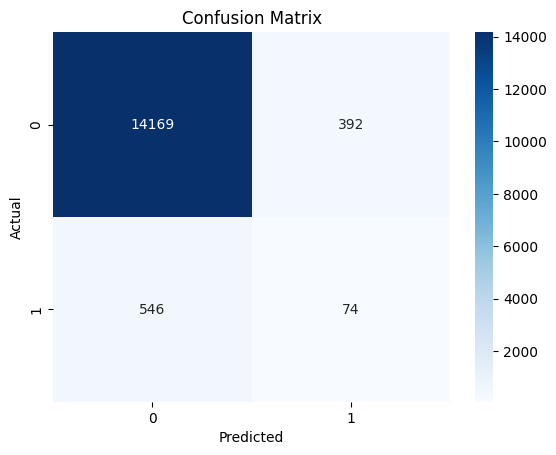

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision=precision_score(y_test, y_pred, average='macro')
recall=recall_score(y_test, y_pred, average='macro')


print(f'Scores (Random Forest) rows: ')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f'Precision: {precision:.4f}')
print(f'recall: {recall:.4f}')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

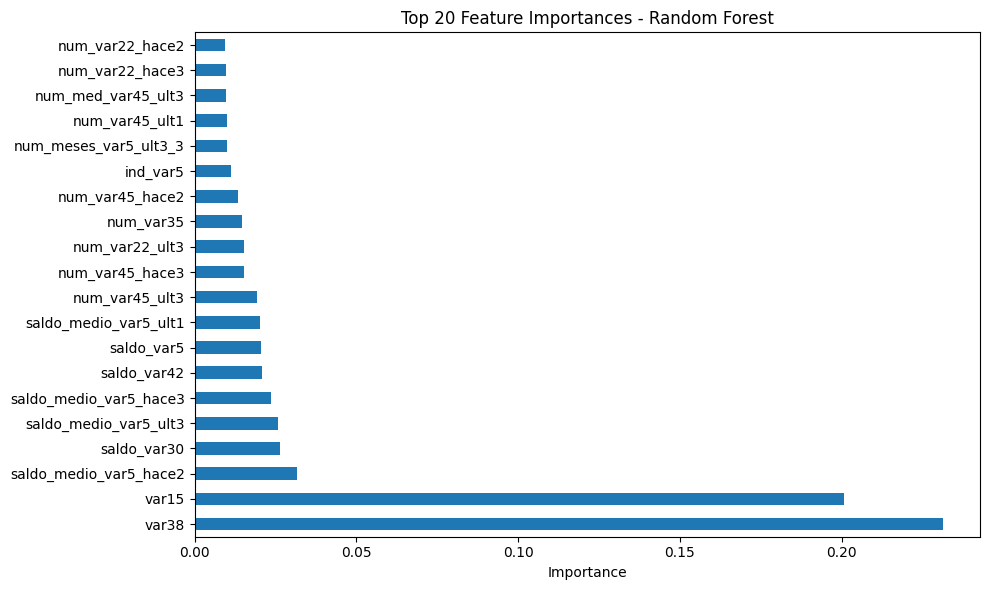

In [ ]:
rf_importances = rf_clf.feature_importances_
rf_features = pd.Series(rf_importances, index=X_train.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
rf_features[:20].plot(kind='barh')  # Top 20
plt.title('Top 20 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

**AUC**

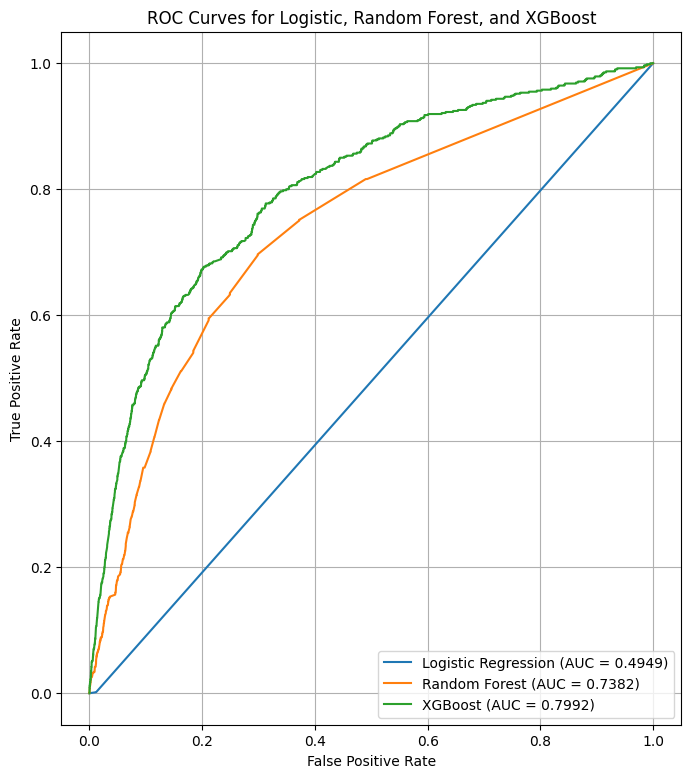

In [ ]:
# Calculating AUC

from sklearn.metrics import roc_curve, auc

log_probs = logistic.predict_proba(X_test)[:, 1]
rf_probs = rf_clf.predict_proba(X_test)[:, 1]
xgb_probs = xg_clf.predict_proba(X_test)[:, 1]


fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 9))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic, Random Forest, and XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()



**Trying GridSearchCV**

In [ ]:
#testing GridSearch with a smaller subset of data

from sklearn.model_selection import GridSearchCV

df_sampled = df.sample(frac=0.2, random_state=42)


X_sampled = df_sampled.drop('TARGET', axis=1)
y_sampled = df_sampled['TARGET']

rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

#xgboost
xgb_param={'n_estimators': [50, 100, 200],'max_depth': [3, 6, 10],'learning_rate': [0.01, 0.1, 0.2]}

#random forest
rf_param={'n_estimators': [50, 100, 200],'max_depth': [10, 20, 30],'class_weight': ['balanced', None]}


In [ ]:
grid_rf = GridSearchCV(estimator=rf_model, param_grid=rf_param, cv=3, n_jobs=-1, scoring='roc_auc')
grid_xgb = GridSearchCV(estimator=xgb_model, param_grid=xgb_param, cv=3, n_jobs=-1, scoring='roc_auc')


In [ ]:
grid_rf.fit(X_sampled, y_sampled)
print("Best Parameters for Random Forest:", grid_rf.best_params_)

Best Parameters for Random Forest: {'class_weight': None, 'max_depth': 20, 'n_estimators': 200}


In [ ]:
grid_xgb.fit(X_sampled, y_sampled)
print("Best Parameters for XGBoost:", grid_xgb.best_params_)


Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
